## Load the S&P 500 Dataset

In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/sfeir/Downloads/archive/all_stocks_5yr.csv')

## Explore the Dataset

In [44]:
# View the first few rows of the dataset
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [45]:
# View the data types and non-null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


## Data Cleaning

In [46]:
# Check for missing values
print(df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [47]:
#drop nan rows
df = df.dropna()

In [48]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [49]:
# Check for duplicates
print(df.duplicated().sum())

# remove any duplicate rows
df.drop_duplicates(keep=False, inplace=True)

0


In [50]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [51]:
# Rename columns
df = df.rename(columns={'Name': 'name'})

In [52]:
# Handle outliers
q1 = df['close'].quantile(0.25)
q3 = df['close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = df[df['close'] <= upper_bound]

In [53]:
#standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, ['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])

# Data Visualization

In [54]:
#import libraries first
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

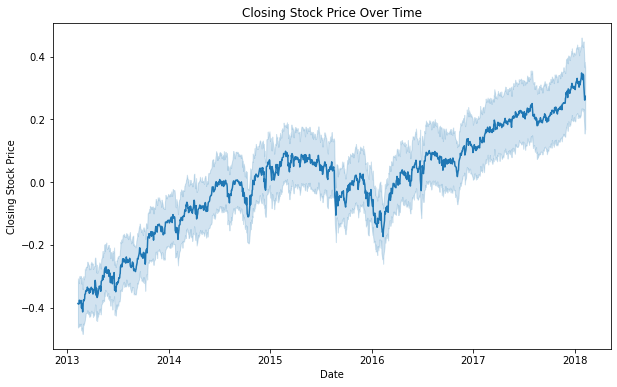

In [55]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

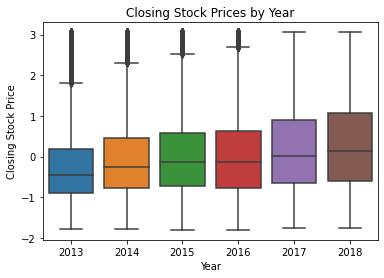

In [56]:
df['year'] = df['date'].dt.year
sns.boxplot(x='year', y='close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

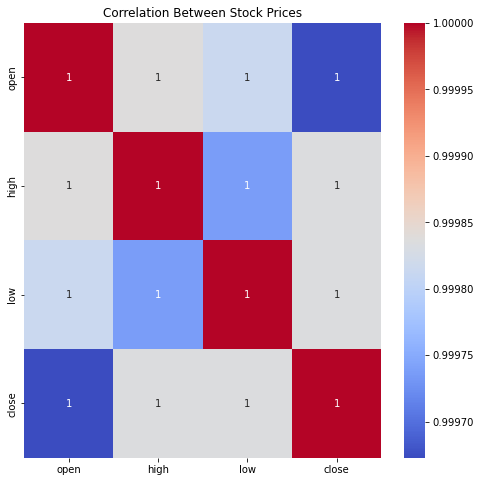

In [57]:
# Create a heatmap of the correlation between stock prices
corr = df[['open', 'high', 'low', 'close']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

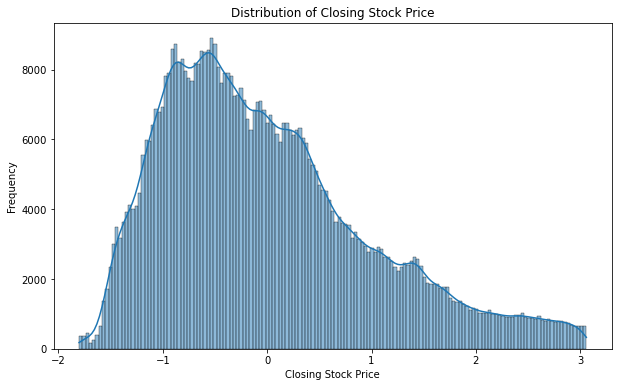

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

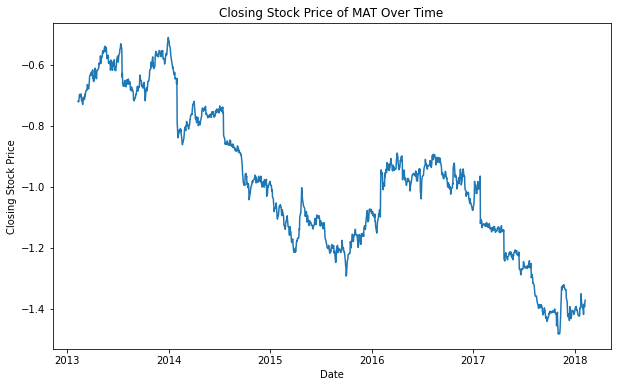

In [59]:
# Line chart of closing stock price for a specific company over time
company_name = 'MAT'
company_df = df[df['name']==company_name]
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close', data=company_df)
plt.title(f'Closing Stock Price of {company_name} Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

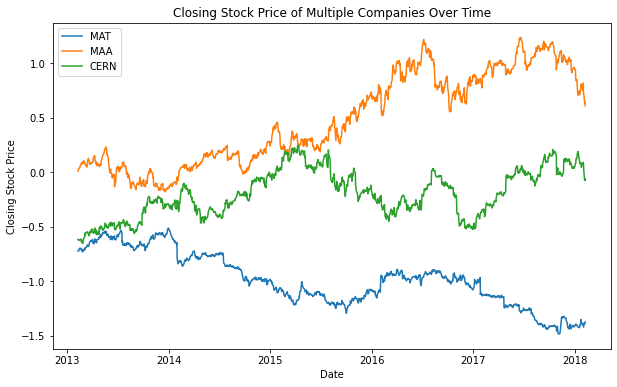

In [60]:
# Line chart of closing stock price for multiple companies over time
companies = ['MAT', 'MAA', 'CERN']
plt.figure(figsize=(10, 6))
for company in companies:
    company_df = df[df['name']==company]
    sns.lineplot(x='date', y='close', data=company_df, label=company)
plt.title('Closing Stock Price of Multiple Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend()
plt.show()

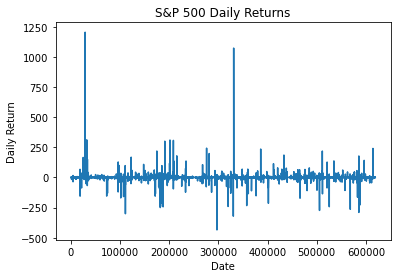

In [61]:
daily_returns = df['close'].pct_change()

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.

In [ ]:
# Create a combination plot of stock prices and volume traded
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='close', data=df, color='b')
sns.lineplot(x='date', y='volume', data=df, color='g', alpha=0.5)
plt.title('S&P 500 Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])
plt.show()

In [ ]:
# Create a histogram of the daily returns
plt.figure(figsize=(12,6))
sns.histplot(df['close'].pct_change().dropna(), bins=100, kde=True)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()